Test the behavious of the package when different modes are selects, and
for different retardatio ratios

In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# testing WAM for various retardatio ratios

# from importlib import reload
import curses  ####  pip install windows-curses
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import specsanalyzer

# load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert

# let's get all the functions to be tested
from specsanalyzer import SpecsAnalyzer
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction


spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict = spa.config
lens_mode = "WideAngleMode"
kinetic_energy = 35.000000
pass_energy = 35.000000
work_function = 4.3
binning = 4

eshift = np.array(config_dict["calib2d_dict"]["eShift"])

aInner, damatrix = get_damatrix_fromcalib2d(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    config_dict,
)

dapolymatrix = calculate_polynomial_coef_da(
    damatrix, kinetic_energy, pass_energy, eshift
)

UnboundLocalError: local variable 'supported_angle_modes' referenced before assignment

In [ ]:
# testing ..
# check the behaviour for various lens modes
lensmodes_angle = [
    "WideAngleMode",
    "LowAngularDispersion",
    "MediumAngularDispersion",
    "HighAngularDispersion",
    "WideAngleMode",
    "SuperWideAngleMode"
]
lensmodes_space =[
    "LargeArea",
    "MediumArea",
    "SmallArea",
    "SmallArea2",
    "HighMagnification2",
    "HighMagnification",
    "MediumMagnification",
    "LowMagnification"
]

#print(lensmodes_angle)
#print(lensmodes_space)
#print()
print(config_dict.keys())
config_dict['calib2d_dict'].keys()
correctiondic=spa.correction_matrix_dict
correctiondic['supported_lens_modes']['lens_modes_angle']


from specsanalyzer.core import get_modes_from_calib_dict

lista,listb=get_modes_from_calib_dict(config_dict['calib2d_dict'])
lista

dict_keys(['calib2d_file', 'nx_pixel', 'ny_pixel', 'pixel_size', 'magnification', 'Ang_Offset_px', 'E_Offset_px', 'apply_fft_filter', 'crop', 'fft_filter_peaks', 'binning', 'calib2d_dict'])


['LowAngularDispersion',
 'MediumAngularDispersion',
 'HighAngularDispersion',
 'WideAngleMode',
 'SuperWideAngleMode']

In [ ]:
spa.config['calib2d_dict']['LowAngularDispersion'].keys()

dict_keys(['rr', 'default'])

In [ ]:
def test_lens_mode(lens_mode:str):
    spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
    config_dict = spa.config

    kinetic_energy = 35.000000
    pass_energy = 35.000000
    work_function = 4.3
    binning = 4

    eshift = np.array(config_dict["calib2d_dict"]["eShift"])

    aInner, damatrix = get_damatrix_fromcalib2d(
        lens_mode,
        kinetic_energy,
        pass_energy,
        work_function,
        config_dict,
    )

    dapolymatrix = calculate_polynomial_coef_da(
        damatrix, kinetic_energy, pass_energy, eshift
    )
    
    
    return (damatrix,dapolymatrix)

for i in lensmodes_angle:
    print(i," ",test_lens_mode(i)[0])

for i in lensmodes_space:
    print(i," ",test_lens_mode(i)[0])


WideAngleMode   [[ 7.19828571e-01  7.53542857e-01  7.59685714e-01]
 [-1.36678571e-03  5.85771429e-02  1.34014286e-01]
 [-1.37997143e-02 -5.04428571e-02 -9.16571429e-02]
 [-4.20521429e-04  9.74571429e-03  1.95942857e-02]]
LowAngularDispersion   [[ 1.32662857  1.45792857  1.55954286]
 [-0.08116786 -0.00798737  0.08224171]
 [-0.06739371 -0.09474643 -0.10714   ]
 [ 0.01095843  0.02346357  0.01222043]]
MediumAngularDispersion   [[ 2.02319048  2.21690476  2.38971429]
 [ 0.13464286  0.24228571  0.37371429]
 [-0.26854762 -0.29955238 -0.34376667]]
HighAngularDispersion   [[ 3.10768571  3.43857143  3.75008571]
 [-0.05453257  0.060176    0.20526171]]
WideAngleMode   [[ 7.19828571e-01  7.53542857e-01  7.59685714e-01]
 [-1.36678571e-03  5.85771429e-02  1.34014286e-01]
 [-1.37997143e-02 -5.04428571e-02 -9.16571429e-02]
 [-4.20521429e-04  9.74571429e-03  1.95942857e-02]]
SuperWideAngleMode   [[ 5.07590000e-01  5.20814286e-01  5.10428571e-01]
 [-3.22977143e-03  4.46740000e-02  1.08621429e-01]
 [-3.981

ValueError: Da values do not exist for the given mode.

In [ ]:
for i in lensmodes_angle:
    print(i," ",test_lens_mode(i)[1])
    

WideAngleMode   [[-4.50145773e-03  3.26489796e-01 -5.15931429e+00]
 [ 2.52950437e-03 -1.38385000e-01  1.80340929e+00]
 [-7.46309038e-04  2.99966531e-02 -1.86097143e-01]
 [-5.18635569e-05  9.34896531e-03 -2.53935214e-01]]
LowAngularDispersion   [[-4.84664723e-03  4.05812245e-01 -6.80835714e+00]
 [ 2.78344490e-03 -1.48152694e-01  1.76763691e+00]
 [ 2.44230904e-03 -1.82317714e-01  3.29454500e+00]
 [-3.87727114e-03  2.71769551e-01 -4.73881357e+00]]
MediumAngularDispersion   [[-3.41302235e-03  3.43632653e-01 -5.62928571e+00]
 [ 3.88338192e-03 -2.03530612e-01  2.60871429e+00]
 [-2.15665695e-03  1.29474830e-01 -2.18926667e+00]]
HighAngularDispersion   [[-3.16268222e-03  4.04930612e-01 -6.85971429e+00]
 [ 4.95953353e-03 -2.72940408e-01  3.53766171e+00]]
WideAngleMode   [[-4.50145773e-03  3.26489796e-01 -5.15931429e+00]
 [ 2.52950437e-03 -1.38385000e-01  1.80340929e+00]
 [-7.46309038e-04  2.99966531e-02 -1.86097143e-01]
 [-5.18635569e-05  9.34896531e-03 -2.53935214e-01]]
SuperWideAngleMode   [[

In [98]:
def test_lens_mode_convert(lens_mode:str):
    #get the test image
    
    # get the raw data
    print(os.getcwd())
    raw_image_name = "/Users/michelepuppin/Documents/GitHub/specsanalyzer/tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv"
    with open(raw_image_name) as file:
        tsv_data = np.loadtxt(file, delimiter="\t")

    configpath = "/Users/michelepuppin/Documents/GitHub/specsanalyzer/tests/data/dataEPFL/config/config.yaml"
    spa = SpecsAnalyzer(config=configpath)
    
    kinetic_energy = 35.000000
    pass_energy = 35.000000
    work_function = 4.3

    converted = spa.convert_image(
        raw_img=tsv_data,
        lens_mode=lens_mode,
        kinetic_energy=kinetic_energy,
        pass_energy=pass_energy,
        work_function=work_function,
        apply_fft_filter=False,
    )
    
    config_dict = spa.config


    eshift = np.array(config_dict["calib2d_dict"]["eShift"])

    aInner, damatrix = get_damatrix_fromcalib2d(
        lens_mode,
        kinetic_energy,
        pass_energy,
        work_function,
        config_dict,
    )

    dapolymatrix = calculate_polynomial_coef_da(
        damatrix, kinetic_energy, pass_energy, eshift
    )
    
    
    return (damatrix,dapolymatrix)

In [ ]:
config_dict = spa.config
config_dict['calib2d_dict']['SmallArea2'].keys()
config_dict['calib2d_dict'].keys()
#config_dict['calib2d_dict']['SmallArea2']['default']['aInner']


dict_keys(['aUnit', 'aInner', 'eShift', 'eRange', 'aRange', 'eGrid', 'aGrid', 'De1', 'Da1', 'Da3', 'Da5', 'Da7', 'LowAngularDispersion', 'MediumAngularDispersion', 'HighAngularDispersion', 'WideAngleMode', 'LargeArea', 'MediumArea', 'SmallArea', 'SmallArea2', 'HighMagnification2', 'HighMagnification', 'MediumMagnification', 'LowMagnification', 'SuperWideAngleMode'])

In [101]:
test_lens_mode_convert("MediumArea")

/Users/michelepuppin/Documents/GitHub/specsanalyzer/tutorial
This is a spatial mode, using default MediumArea config
This is a spatial mode, using default MediumArea config


(array([[3., 3., 3.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[ 1.24990616e-16, -9.16398284e-15,  3.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]))

This is a spatial mode, using default HighMagnification2 config


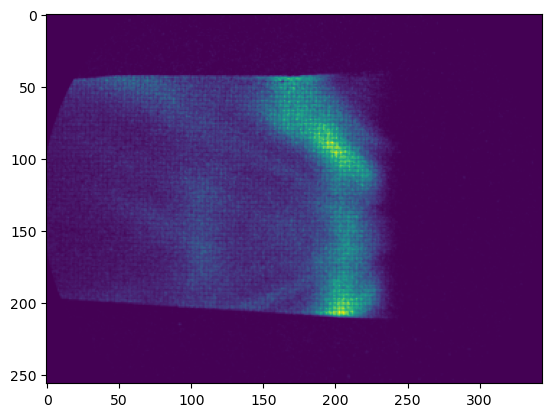

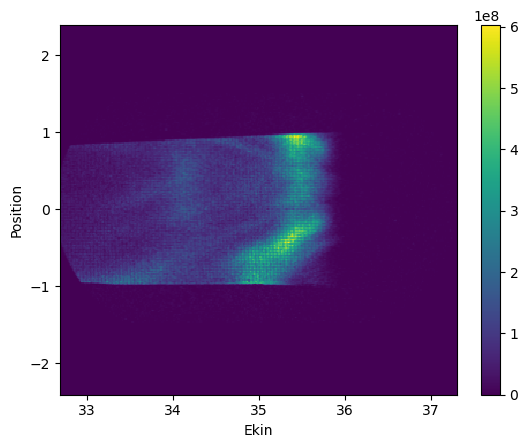

In [104]:
with open("../tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv") as file:
    tsv_data = np.loadtxt(file, delimiter="\t")
plt.figure()
plt.imshow(tsv_data)
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode = "HighMagnification2"
kinetic_energy = 35.0
pass_energy = 35.0
work_function = 4.2

res_xarray = spa.convert_image(
    tsv_data, lens_mode, kinetic_energy, pass_energy, work_function
)
plt.figure()
res_xarray.plot(cmap="viridis", vmin=0)

TODO
        try all possible modes

        minimum and max rr for each mode:
            [LowAngularDispersion@0.070]
            [LowAngularDispersion@30.000]
            Da1 Da3 Da5 Da7

            [MediumAngularDispersion@0.100]
            [MediumAngularDispersion@54.000]
            Da1 Da3 Da5 **

            [HighAngularDispersion@0.100]
            [HighAngularDispersion@65.000]
            Da1 Da3

            [WideAngleMode@0.10]
            [WideAngleMode@10.00]
            Da1 Da3 Da5 Da7

            [SuperWideAngleMode@0.060]
            [SuperWideAngleMode@10.000]
            Da1 Da3 Da5 Da7


# =================== LargeArea =================== 
Spatially resolved modes have only a Da1 coefficient, these have to 
be treated independently (result is mm not in degree!)

[LargeArea defaults]
aUnit  = "mm"
aInner = 18 # mm
aRange = -18 18 # mm
aGrid  = 2 # mm
eGrid  = 0.02 # Ep
Da1    = 1 1 1 # mm_z/mm

[LargeArea@0.1]
[LargeArea@1000]
[MediumArea@0.1]
[MediumArea@500]
[SmallArea@0.1]
[SmallArea@1500]
[SmallArea2@0.2]
[SmallArea2@300]
[HighMagnification2@0.1]
[HighMagnification2@300]
[HighMagnification@0.1]
[HighMagnification@1500]
[MediumMagnification@0.1]
[MediumMagnification@1500]
[LowMagnification@0.1]
[LowMagnification@1500]




From specs manual

Lens Mode Dispersion D Acceptance angle Energy range
High Angular Dispersion 3.2 mm/º ±3º Ep × [0.10 – 65]
Medium Angular Dispersion 2.3 mm/º ±4º Ep × [0.10 – 300]
Low Angular Dispersion 1.5 mm/º ±7º Ep × [0.05 – 30]
Medium Angle Mode 1.0 mm/° ±10° Ep × [0.07 – 20]
Wide Angle Mode 0.75 mm/º ±15º Ep × [0.10 – 10]


            what to do if the selected data exceeds this mode? 

        what is the behaviour when the mode as no angular resolution?
            shall if just build a simplified case structure??
        
        We need to check what is the proper way of converting images with less das